# 사이킷런 라벨 붙히기

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
items = ["tv", "냉장고", "컴퓨터", "전자레인지", "믹서", "선풍기", "믹서"]
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print('labels:', labels)
print('encoder.classes:', encoder.classes_)
print('encoder.inverse_transform :',encoder.inverse_transform([4, 5, 3, 2, 4, 2, 0, 1, 1]))


labels: [0 1 5 4 2 3 2]
encoder.classes: ['tv' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
encoder.inverse_transform : ['전자레인지' '컴퓨터' '선풍기' '믹서' '전자레인지' '믹서' 'tv' '냉장고' '냉장고']


# 원핫 인코딩

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame({'items': items})
print(df)

print(pd.get_dummies(df))

   items
0     tv
1    냉장고
2    컴퓨터
3  전자레인지
4     믹서
5    선풍기
6     믹서
   items_tv  items_냉장고  items_믹서  items_선풍기  items_전자레인지  items_컴퓨터
0         1          0         0          0            0          0
1         0          1         0          0            0          0
2         0          0         0          0            0          1
3         0          0         0          0            1          0
4         0          0         1          0            0          0
5         0          0         0          1            0          0
6         0          0         1          0            0          0


# 유방암 데이터셋 실습

# 데이터 스케일링

1. StandardScaler() : 평균 0, 분산 1인 정규분포로 만듦
2. MinMaxScaler() : 최대값 1, 최솟값 0, 이상치에 취약
3. RobustScaler() : 중앙값 0 / IQR(1분위(25%) ~ 3분위(75%)) = 1, 이상치 영향 적음
4. Normalizer() : 열을 대상으로 함, 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 생성, 학습속또 빠르고 과적합 확률 낮춤


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [ ]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('모델의 정확도 :', round(dtc.score(X_test, y_test), 4))

모델의 정확도 : 0.9123


# Standardization 평균 0 / 분산 1

In [13]:
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
std = StandardScaler()

# 교차검증시
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9035


# 시각화

In [14]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

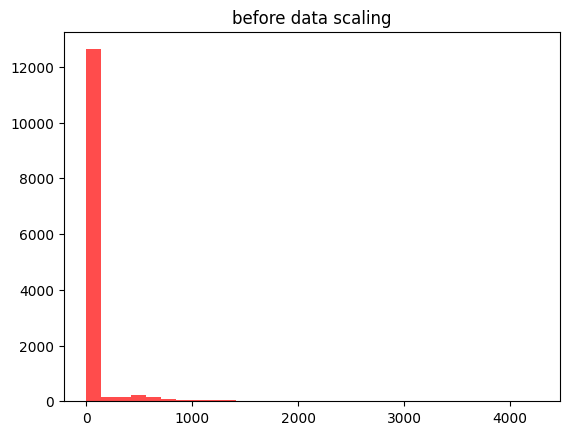

In [16]:
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

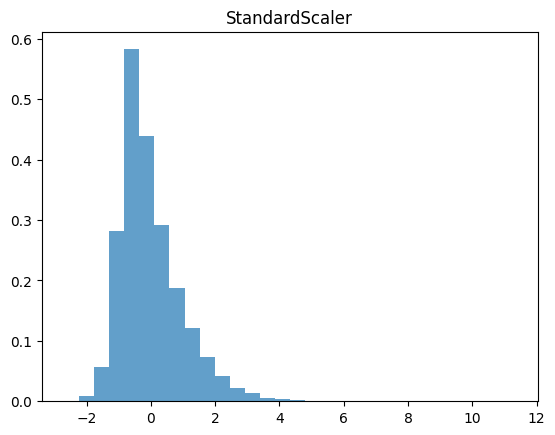

In [17]:
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

#MinMaxScaler()

In [21]:
#MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

#normalization 최소값 0 / 최대값 1
mms = MinMaxScaler()

#교차검증시
mms.fit(X_train)
X_train_scaled_mms = mms.transform(X_train)
X_test_scaled_mms = mms.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9035


In [22]:
X_train_scaled

array([[0.56168275, 0.7081761 , 0.55664674, ..., 0.64329897, 0.33372758,
        0.27653155],
       [0.52005485, 0.37190776, 0.50256191, ..., 0.53986254, 0.32347723,
        0.09405746],
       [0.31093589, 0.26289308, 0.29746655, ..., 0.25611684, 0.22866154,
        0.11347239],
       ...,
       [0.50242421, 0.43186583, 0.47124964, ..., 0.40721649, 0.65385374,
        0.03981372],
       [0.5807826 , 0.79916143, 0.60930828, ..., 0.66701031, 0.24699389,
        0.29817657],
       [0.18752143, 0.21886792, 0.18424424, ..., 0.33017182, 0.2166371 ,
        0.1511872 ]])

In [24]:
X_train_scaled_mms = X_train_scaled_mms.reshape(13650,1)

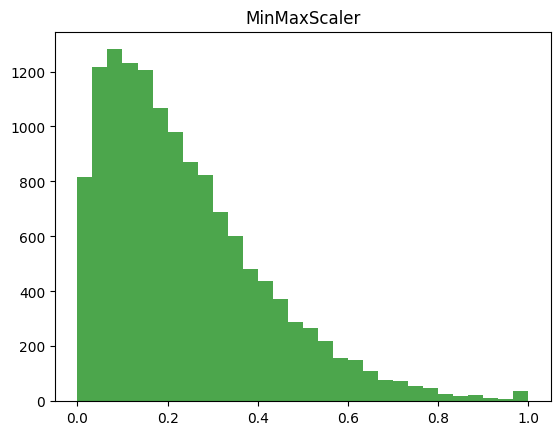

In [25]:
#스케일링 후의 데이터 값들이 0과 1사이에 분포
plt.hist(X_train_scaled_mms, bins=30, color='green', alpha = 0.7)
plt.title('MinMaxScaler')
plt.show()

# MaxAbsScaler() : 최대값은 1 최소값은 0으로 최소-최대 정규화 Min-Max Normalization 이상치에 취약

In [27]:
# MaxAbsScaler() : 최대값은 1 최소값은 0으로 최소-최대 정규화 Min-Max Normalization 이상치에 취약
from sklearn.preprocessing import MaxAbsScaler
#절대값
scaler = MaxAbsScaler()

#교차검증시
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9035


# RobustScaler()

In [28]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
rbs.fit(X_train)
X_train_scaled_rbs = rbs.transform(X_train)
X_test_scaled_rbs = rbs.transform(X_test)

dtc.fit(X_train_scaled_rbs, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled_rbs, y_test), 4))

모델의 정확도 : 0.9035


# svm

In [29]:
from sklearn import svm, datasets
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
import pandas as pd
dfX = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dfy = pd.DataFrame(cancer.target, columns=['target'])
print('features ;', dfX.shape)
print('lable : ', dfy.shape)

features ; (569, 30)
lable :  (569, 1)


In [31]:
dfX.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
dfy.head()

,target
0,0
1,0
2,0
3,0
4,0


In [34]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#데이터 분할

In [35]:
#데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455, 1) (114, 1)


# 데이터 스케일링

In [36]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
y_train = y_train.values
X_train[:3, :]

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
        -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
         3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
        -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
         1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
         0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
         1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
         2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
         3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
        -0.30735463, -0.36555756, -0.69650228,  1

In [37]:
X_test = sc.transform(X_test)
y_test = y_test.values

In [38]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [164]:
y_test = y_test.flatten()
y_pred = svc.predict(X_test)
y_pred

AttributeError: ignored

In [40]:
from sklearn.metrics import *

print("정확도 : ", accuracy_score(y_test, y_pred))

정확도 :  0.956140350877193


# 펭귄 데이터 분석

In [ ]:
# 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
# 데이터 확인
df = pd.read_csv('/content/drive/MyDrive/fly_ai/2주차/2주차학습데이터/penguins_size.csv')
df

In [128]:
df.shape

(344, 7)

In [132]:
missing_values = df.isnull()

# 각 열의 결측치 개수 확인
missing_count = df.isnull().sum()

missing_count

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

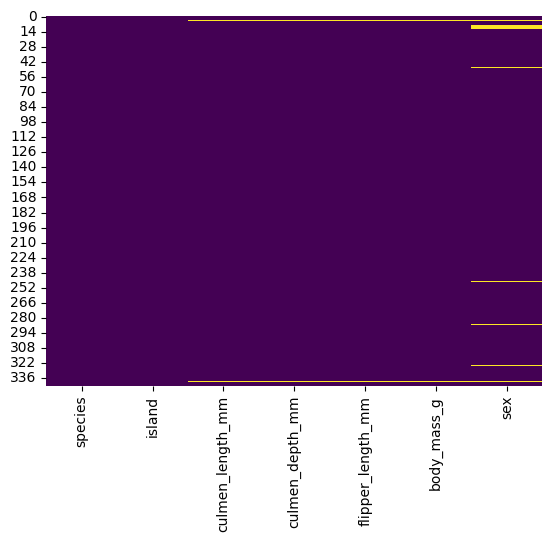

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [131]:
df['sex'] = df['sex'].replace('.', float('NaN'))

In [133]:
df_cleaned = df.dropna()
missing_values = df_cleaned.isnull()

# 각 열의 결측치 개수 확인
missing_count = df_cleaned.isnull().sum()

missing_count

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [136]:
df_cleaned.shape

(333, 7)

In [146]:
import pandas as pd


correlation_matrix = df_cleaned.corr()

# 상관관계 행렬 출력
print(correlation_matrix)


                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.228626           0.653096   
culmen_depth_mm           -0.228626         1.000000          -0.577792   
flipper_length_mm          0.653096        -0.577792           1.000000   
body_mass_g                0.589451        -0.472016           0.872979   
species_encoded            0.730548        -0.740346           0.850737   
island_encoded            -0.337179         0.568031          -0.554413   
sex_encoded                0.344078         0.372673           0.255169   

                   body_mass_g  species_encoded  island_encoded  sex_encoded  
culmen_length_mm      0.589451         0.730548       -0.337179     0.344078  
culmen_depth_mm      -0.472016        -0.740346        0.568031     0.372673  
flipper_length_mm     0.872979         0.850737       -0.554413     0.255169  
body_mass_g           1.000000         0.750434       -0.559526     0.424987  
spec

<ipython-input-146-e1728d471521>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


# island 사용 여부 결정

<ipython-input-147-b1850e86957e>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


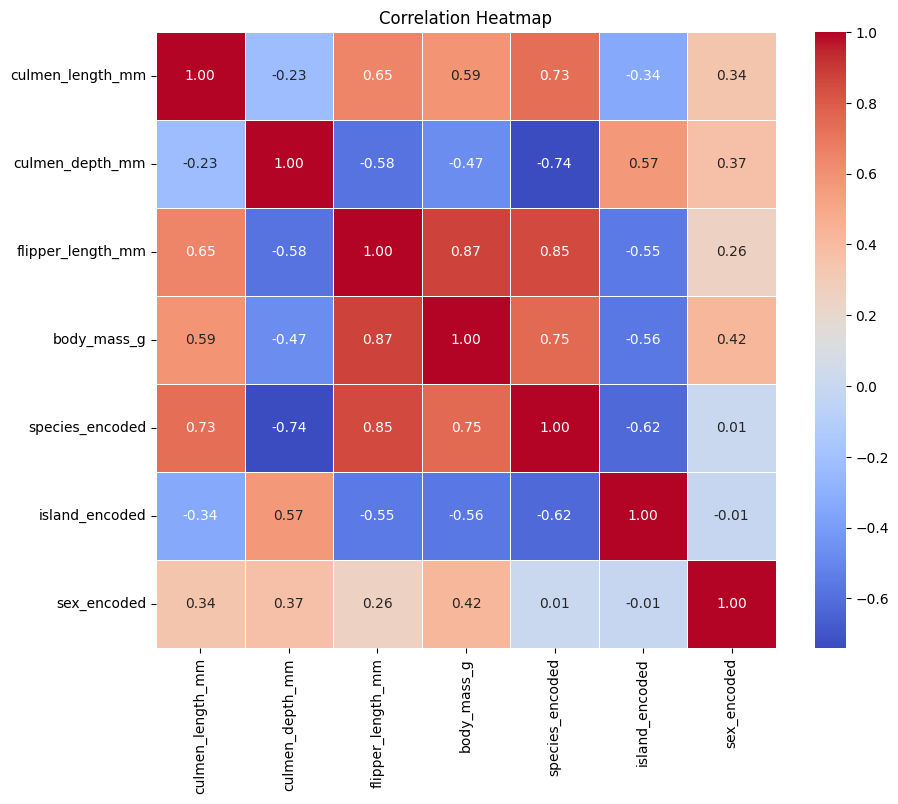

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 불러오기 또는 정의하기 (예: df_cleaned = pd.read_csv('your_data.csv'))
# 여기서는 df_cleaned가 어디서 왔는지 알 수 없으므로 미리 정의되어 있다고 가정하겠습니다.

# 모든 변수 간 상관관계 계산
correlation_matrix = df_cleaned.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_cleaned['species_encoded'] = le.fit_transform(df_cleaned['species'])
df_cleaned['sex_encoded'] = le.fit_transform(df_cleaned['sex'])

print(df_cleaned[['species', 'species_encoded', 'sex', 'sex_encoded']].head())


In [167]:
X = df_cleaned[['species_encoded', 'culmen_length_mm',	'flipper_length_mm',	'sex_encoded']]
y = df_cleaned['body_mass_g']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [174]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('standard정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

standard정확도 : 0.0597


In [175]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import *

print("svm 정확도 : ", accuracy_score(y_test, y_pred))

svm 정확도 :  0.029850746268656716


In [176]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

mms.fit(X_train)
X_train_scaled_mms = mms.transform(X_train)
X_test_scaled_mms = mms.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('min max 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

min max 정확도 : 0.0597
